# **Jupyter Notebook on THE HIERARCHY OF CONSERVATIVENESS IN FLUID DYNAMICS: EVALUATING CLASSICAL SOLVERS AND PHYSICS-INFORMED NEURAL NETWORKS**

## Authors:
- Arun Govind Neelan
- Ferdin Sagai Don Bosco
- Naveen Sagar Jarugumalli
- Suresh Balaji Vedarethinam

## Reference
https://arxiv.org/abs/2506.22413

## Cite as:
Neelan, Arun Govind, et al. "Physics-Informed Neural Networks: Bridging the Divide Between Conservative and Non-Conservative Equations." arXiv preprint arXiv:2506.22413 (2025).




## 🎯 Available Problems:

### Burgers Equation
1. **Conservative with Discontinuous IC** - Learns artificial viscosity for shock capturing
2. **Conservative with Smooth IC** - Gaussian initial condition with adaptive viscosity
3. **Non-Conservative with Discontinuous IC** - Standard viscous Burgers with step function
4. **Non-Conservative with Smooth IC** - Standard viscous Burgers with Gaussian IC

### Euler Equations (Gas Dynamics)
5. **Sod Shock Tube (Conservative)** - Classic 1D Riemann problem
6. **Sod Shock Tube (Non-Conservative)** - Alternative formulation
7. **Lax Problem (Conservative)** - Different initial conditions for Euler equations

### 2D Compressible Flow
8. **Wedge Flow (Conservative)** - 2D flow around wedge geometry
9. **Wedge Flow (Non-Conservative)** - Alternative 2D formulation

---

## Information

### Dependencies Required:
- `torch` (PyTorch)
- `numpy`
- `matplotlib`
- `pyDOE` (Design of Experiments)
- `scipy` (for some problems)

### Performance Notes:
- Training times vary from 1-10 minutes depending on problem complexity
- GPU acceleration recommended for faster training
- 2D problems (wedge flow) are computationally more intensive

### File Structure:
```
├── Combined_PINN_Suite.ipynb          # This notebook
├── problem_codes/
│   ├── burg_conserve_discontinuous.py
│   ├── burg_conserve_smooth.py
│   ├── burg_non_conserve_discontinuous.py
│   ├── burg_non_conserve_smooth.py
│   ├── sod_conservative.py
│   ├── sod_non_conservative.py
│   ├── lax_conservative.py
│   ├── wedge_conservative.py
│   └── wedge_non_conservative.py
```

## **How to Use This PINN Notebook:**
1. **Scroll down** to find the problem you want
2. **Click the ▶️ button** next to the code cell
3. **Wait for it to run** (may take 1-10 minutes for training)
4. **See the results** (graphs, training progress) below the cell

## **Important Notes:**
- **Only run ONE problem at a time** (they're computationally intensive)
- **Wait for completion** before running another cell
- **Cells can take several minutes** to complete (this is normal!)

## **0. Simple Test to ensure dependencies are met**

Before running the complex PINN problems, try this simple test cell below to make sure everything works:

In [2]:
# Quick dependency test
import torch
import numpy as np
import matplotlib.pyplot as plt
print("✅ All dependencies loaded successfully!")
print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ Device available: {'cuda' if torch.cuda.is_available() else 'cpu'}")

✅ All dependencies loaded successfully!
✅ PyTorch version: 2.10.0+cu128
✅ Device available: cuda


---
## **1. Problem Statement Burgers Conservative (Discontinuous IC)**

**Description:** Conservative form of Burgers equation with step function initial condition. The PINN learns adaptive artificial viscosity to capture shock formation.

**Equation:** $\frac{\partial u}{\partial t} + \frac{\partial}{\partial x}\left(\frac{u^2}{2}\right) = \nu(x,t) \frac{\partial^2 u}{\partial x^2}$

**Features:**
- Adaptive viscosity network
- Shock capturing
- Discontinuous initial condition: $u(x,0) = 1$ for $x < 0$, $u(x,0) = 0$ for $x \geq 0$

🔥 Burgers Equation - Conservative with Discontinuous Initial Conditions
🖥️ Using device: cuda
📊 Generating data...
🏗️ Building PINN model...
🚀 Starting training...


/home/fsdb/PINNs_AGN/.venv/lib/python3.12/site-packages/torch/autograd/graph.py:865: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:330.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Iter 0, Loss: 1.2720e+01
Iter 1000, Loss: 3.5941e-02
Iter 2000, Loss: 1.5031e-02
Iter 3000, Loss: 1.2130e-02
Iter 4000, Loss: 3.4581e-03
Iter 5000, Loss: 8.2517e-04
Iter 6000, Loss: 4.9112e-04
Iter 7000, Loss: 3.5225e-04
Iter 8000, Loss: 2.8065e-04
Iter 9000, Loss: 2.4291e-04
📈 Generating predictions and plots...


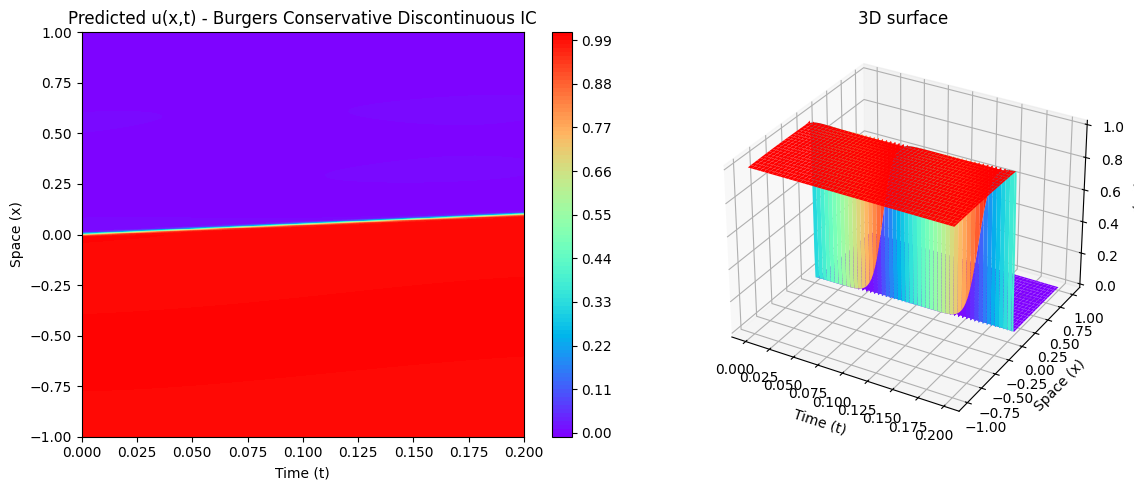

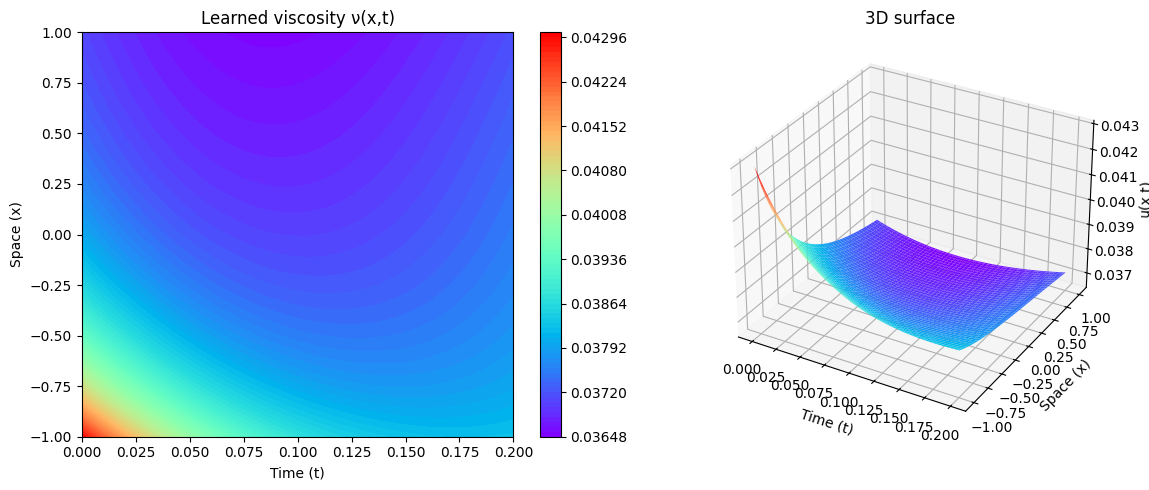

✅ Burgers Conservative Discontinuous IC problem completed!


In [3]:
# 🔸 PROBLEM 1: Burgers Conservative (Discontinuous IC)
exec(open('problem_codes/burg_conserve_discontinuous.py').read())

---
## **2. Problem Statement Burgers Conservative (Smooth IC)**

**Description:** Conservative Burgers equation with smooth Gaussian initial condition. Demonstrates how the PINN handles smooth solutions that develop into shocks.

**Initial Condition:** $u(x,0) = e^{-10x^2}$ (Gaussian pulse)

**Features:**
- Smooth initial condition evolution
- Shock formation from smooth data
- Adaptive viscosity learning

🔥 Burgers Equation - Conservative with Smooth Initial Conditions
🖥️ Using device: cuda
📊 Generating data with smooth Gaussian initial conditions...
🏗️ Building PINN model...
🚀 Starting training...
Iter 0, Loss: 1.2212e+01
Iter 1000, Loss: 8.3133e-03
Iter 2000, Loss: 3.8596e-03
Iter 3000, Loss: 2.3099e-03
Iter 4000, Loss: 1.6592e-03
Iter 5000, Loss: 1.3947e-03
Iter 6000, Loss: 1.2636e-03
Iter 7000, Loss: 9.1781e-04
Iter 8000, Loss: 8.3159e-04
Iter 9000, Loss: 7.6261e-04
📈 Generating predictions and plots...


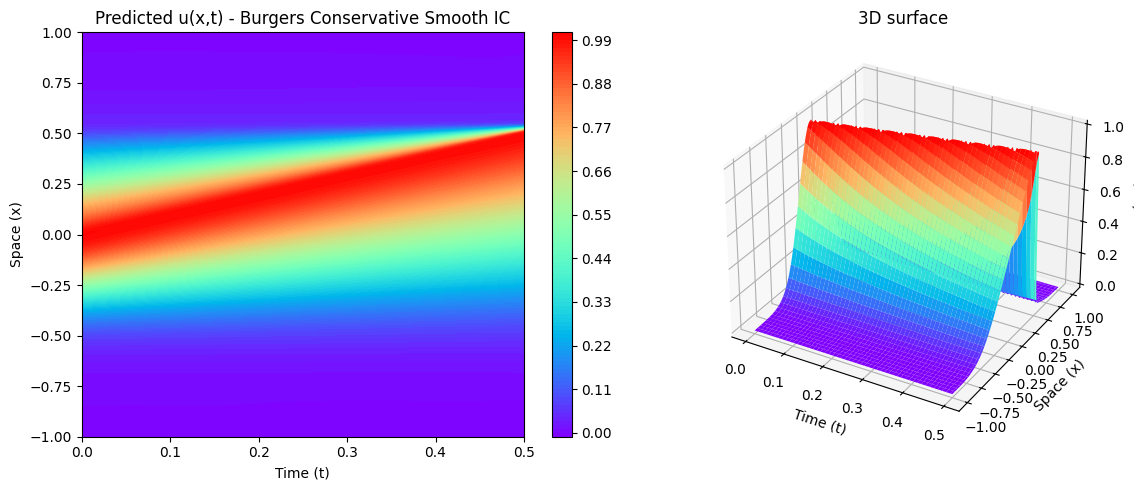

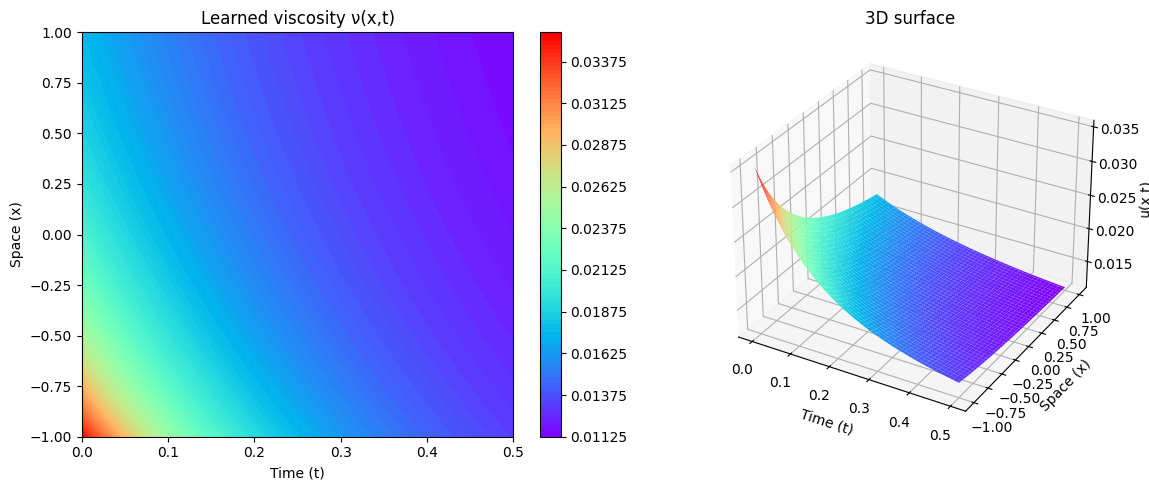

✅ Burgers Conservative Smooth IC problem completed!


In [4]:
# 🔸 PROBLEM 2: Burgers Conservative (Smooth IC)
exec(open('problem_codes/burg_conserve_smooth.py').read())

---
## **3. Problem Statement Burgers Non-Conservative (Discontinuous IC)**

**Description:** Standard viscous Burgers equation in non-conservative form with step function initial condition.

**Equation:** $\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$

**Features:**
- Fixed viscosity coefficient
- Non-conservative formulation
- Step function initial condition

🔥 Burgers Equation - Non-Conservative with Discontinuous Initial Conditions
🖥️ Using device: cuda
📊 Generating data...
🏗️ Building PINN model...
🚀 Starting training...
Iter 0, Loss: 4.4663e-01
Iter 1000, Loss: 3.6233e-03
Iter 2000, Loss: 2.5409e-03
Iter 3000, Loss: 1.9279e-03
Iter 4000, Loss: 1.4984e-03
Iter 5000, Loss: 1.2531e-03
Iter 6000, Loss: 1.0377e-03
Iter 7000, Loss: 1.5644e-03
Iter 8000, Loss: 7.4753e-04
Iter 9000, Loss: 6.3852e-04
📈 Generating predictions and plots...


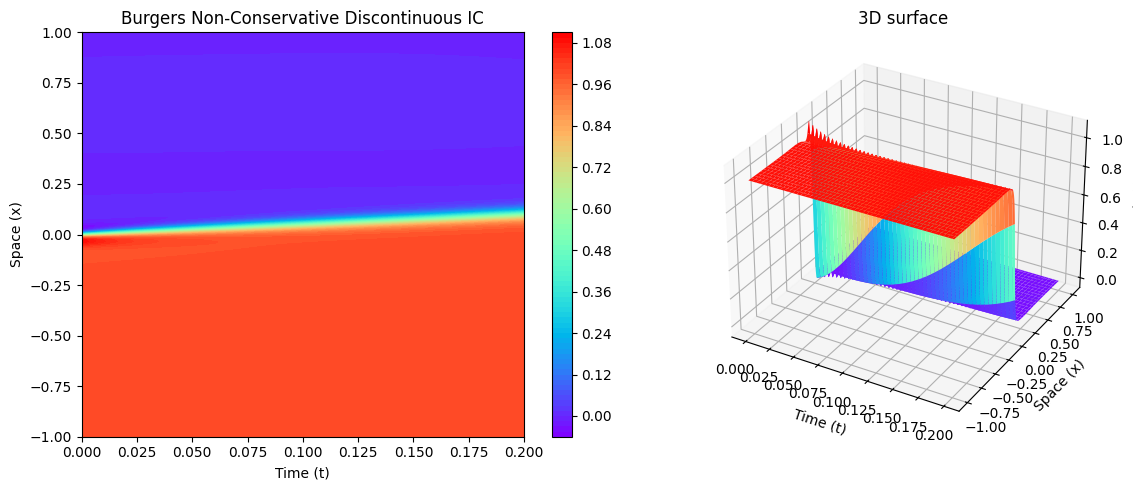

✅ Burgers Non-Conservative Discontinuous IC problem completed!


In [5]:
# 🔸 PROBLEM 3: Burgers Non-Conservative (Discontinuous IC)
exec(open('problem_codes/burg_non_conserve_discontinuous.py').read())

---
## **4. Problem Statement Burgers Non-Conservative (Smooth IC)**

**Description:** Standard viscous Burgers equation with smooth Gaussian initial condition.

**Features:**
- Fixed viscosity
- Smooth Gaussian initial pulse
- Non-conservative form

<string>:6: DeprecationWarning: Importing `pyDOE` is deprecated and will be removed in a future release. Please import `pydoe` instead.


🔥 Burgers Equation - Non-Conservative with Smooth Initial Conditions
🖥️ Using device: cuda
📊 Generating data with smooth initial conditions...
🏗️ Building PINN model...
🚀 Starting training...


/home/fsdb/PINNs_AGN/.venv/lib/python3.12/site-packages/torch/autograd/graph.py:865: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:330.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Iter 0, Loss: 1.7353e-01
Iter 1000, Loss: 1.2603e-04
Iter 2000, Loss: 2.3294e-05
Iter 3000, Loss: 1.2058e-05
Iter 4000, Loss: 8.1605e-06
Iter 5000, Loss: 6.1315e-06
Iter 6000, Loss: 8.1677e-06
Iter 7000, Loss: 2.0490e-05
Iter 8000, Loss: 3.4817e-06
Iter 9000, Loss: 5.6097e-06
📈 Generating predictions and plots...


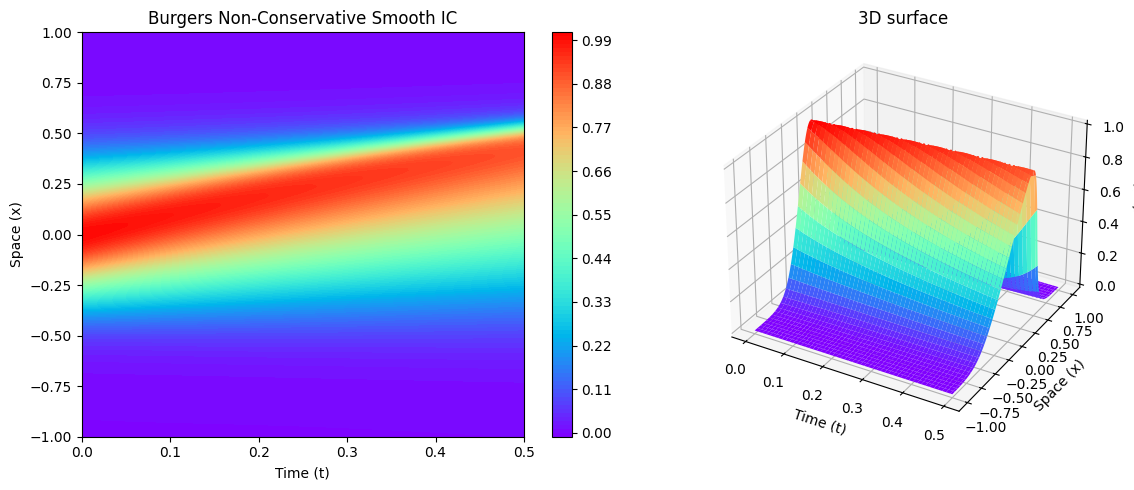

✅ Burgers Non-Conservative Smooth IC problem completed!


In [1]:
# 🔸 PROBLEM 4: Burgers Non-Conservative (Smooth IC)\n
exec(open('problem_codes/burg_non_conserve_smooth.py').read())

---
## **5. Problem Statement Sod Shock Tube (Conservative)**

**Description:** Classic 1D Riemann problem for the compressible Euler equations. Models shock tube experiment with high/low pressure regions.

**Equations:** Conservative Euler equations

$\frac{\partial \rho}{\partial t} + \frac{\partial (\rho u)}{\partial x} = 0$

$\frac{\partial (\rho u)}{\partial t} + \frac{\partial (\rho u^2 + p)}{\partial x} = 0$

$\frac{\partial E}{\partial t} + \frac{\partial ((E + p)u)}{\partial x} = 0$

**Initial Conditions:**
- Left: 

$ \rho = 1.0$

$ p = 1.0$

$ u = 0$

- Right: 

$\rho = 0.125$

$ p = 0.1$

$ u = 0$

Sod Shock Tube Problem - Conservative Euler Equations
Using device: cuda
Generating training data...
Building PINN model...
Starting training with Adam optimizer...
Epoch 0: loss 1.190598
Epoch 500: loss 0.080258
Epoch 1000: loss 0.049123
Epoch 1500: loss 0.038962
Epoch 2000: loss 0.031539
Epoch 2500: loss 0.028300
Epoch 3000: loss 0.023988
Epoch 3500: loss 0.021051
Epoch 4000: loss 0.020844
Epoch 4500: loss 0.019211
Training completed in 128.05 seconds (Adam only)
Generating predictions and plots...


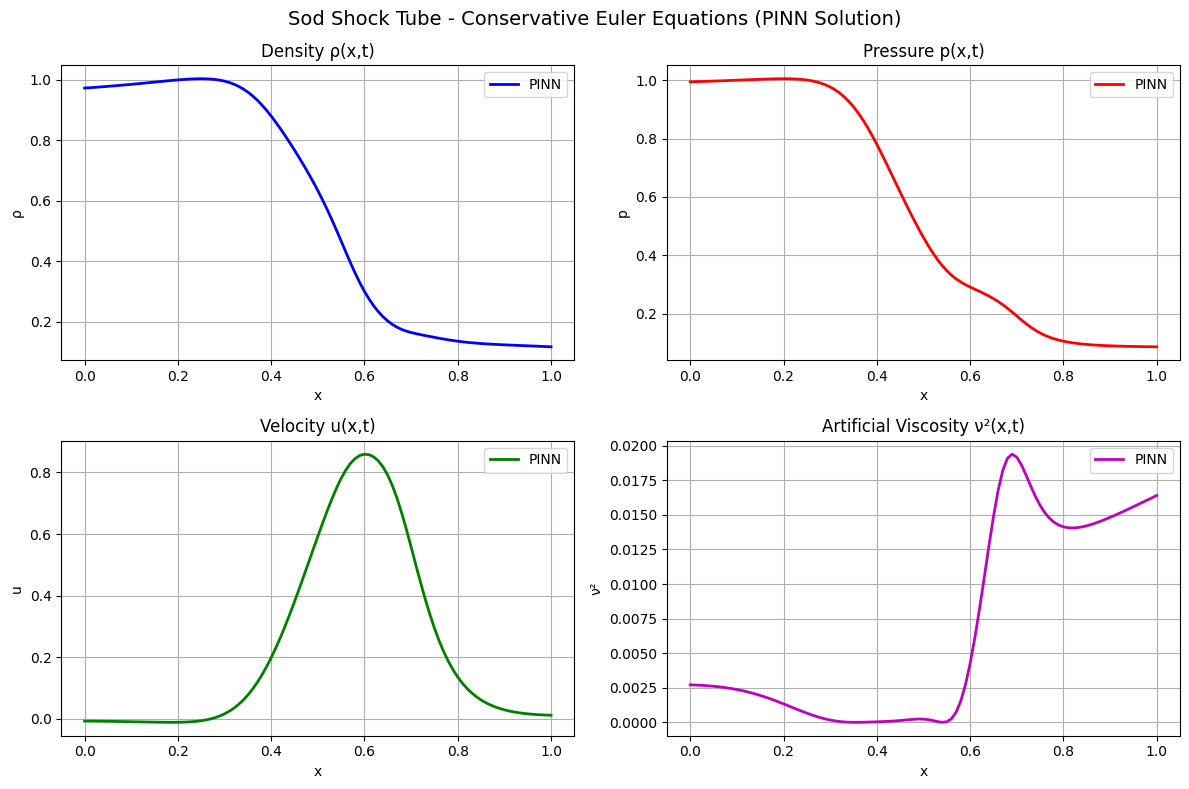

Sod Conservative problem completed!


In [1]:
# 5 Problem Statement Sod Shock Tube (Conservative)
exec(open('problem_codes/sod_conservative.py').read())

---
## **6. Problem Statement Sod Shock Tube (Non-Conservative)**

**Description:** Alternative formulation of the Sod shock tube problem using non-conservative form of Euler equations.

**Features:**
- Non-conservative Euler formulation
- Same initial conditions as Problem 5
- Direct solution of primitive variables

🔥 Sod Shock Tube Problem - Non-Conservative Euler Equations
🖥️ Using device: cuda
📊 Generating training data...
🏗️ Building PINN model...
🚀 Starting training...
Epoch 100: loss 0.335218
Epoch 200: loss 0.215942
Epoch 300: loss 0.109169
Epoch 400: loss 0.090556
Epoch 500: loss 0.081412
Epoch 600: loss 0.064454
Epoch 700: loss 0.048471
Epoch 800: loss 0.040226
Epoch 900: loss 0.035241
Epoch 1000: loss 0.031580
📈 Generating predictions and plots...


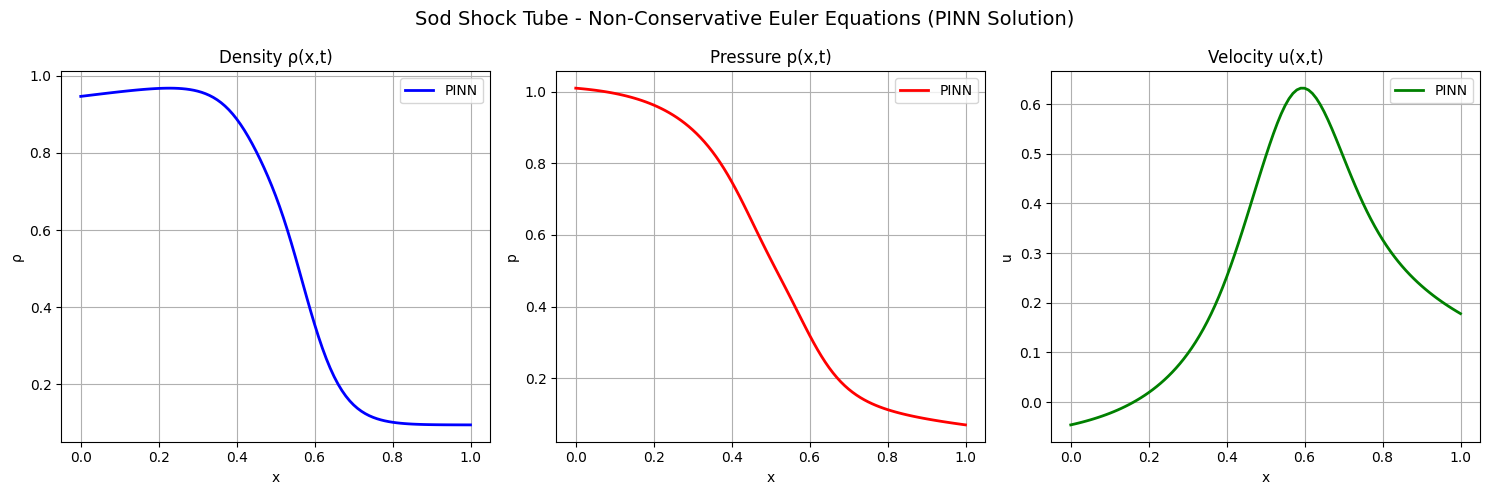

✅ Sod Non-Conservative problem completed!


In [1]:
# 🔸 PROBLEM 6: Sod Shock Tube (Non-Conservative)\n
exec(open('problem_codes/sod_non_conservative.py').read())

---
## **7. Problem Statement Lax Problem (Conservative)**

**Description:** Another classic 1D Riemann problem with different initial conditions than the Sod problem. Tests PINN ability to handle different shock/rarefaction wave patterns.

**Initial Conditions:**
- Left: 

$\rho = 0.445$

$ p = 3.528$

$ u = 0.698$

- Right: 

$\rho = 0.5$

$p = 0.571$

$u = 0$

**Features:**
- Conservative Euler equations
- Different wave structure than Sod problem
- Adaptive artificial viscosity

Lax Problem - Conservative Euler Equations
Using device: cuda
Generating training data...
Building PINN model...
Starting training for 300 epochs (Adam only)...
Epoch 50/300 | Total Loss: 9.181759e+00 | PDE Loss: 3.226551e-01 | IC Loss: 2.953035e+00 | Mean Predicted nu: 5.477814e-01 | Time Elapsed: 1.48s
Epoch 100/300 | Total Loss: 6.966237e+00 | PDE Loss: 1.139777e-01 | IC Loss: 2.284086e+00 | Mean Predicted nu: 3.274953e-01 | Time Elapsed: 2.70s
Epoch 150/300 | Total Loss: 6.544046e+00 | PDE Loss: 1.361435e-01 | IC Loss: 2.135967e+00 | Mean Predicted nu: 2.458243e-01 | Time Elapsed: 3.94s
Epoch 200/300 | Total Loss: 6.016671e+00 | PDE Loss: 7.259164e-01 | IC Loss: 1.763585e+00 | Mean Predicted nu: 2.121064e-01 | Time Elapsed: 5.15s
Epoch 250/300 | Total Loss: 5.714804e+00 | PDE Loss: 8.136391e-01 | IC Loss: 1.633722e+00 | Mean Predicted nu: 2.006023e-01 | Time Elapsed: 6.36s
Epoch 300/300 | Total Loss: 5.357230e+00 | PDE Loss: 7.814177e-01 | IC Loss: 1.525271e+00 | Mean Predicted nu:

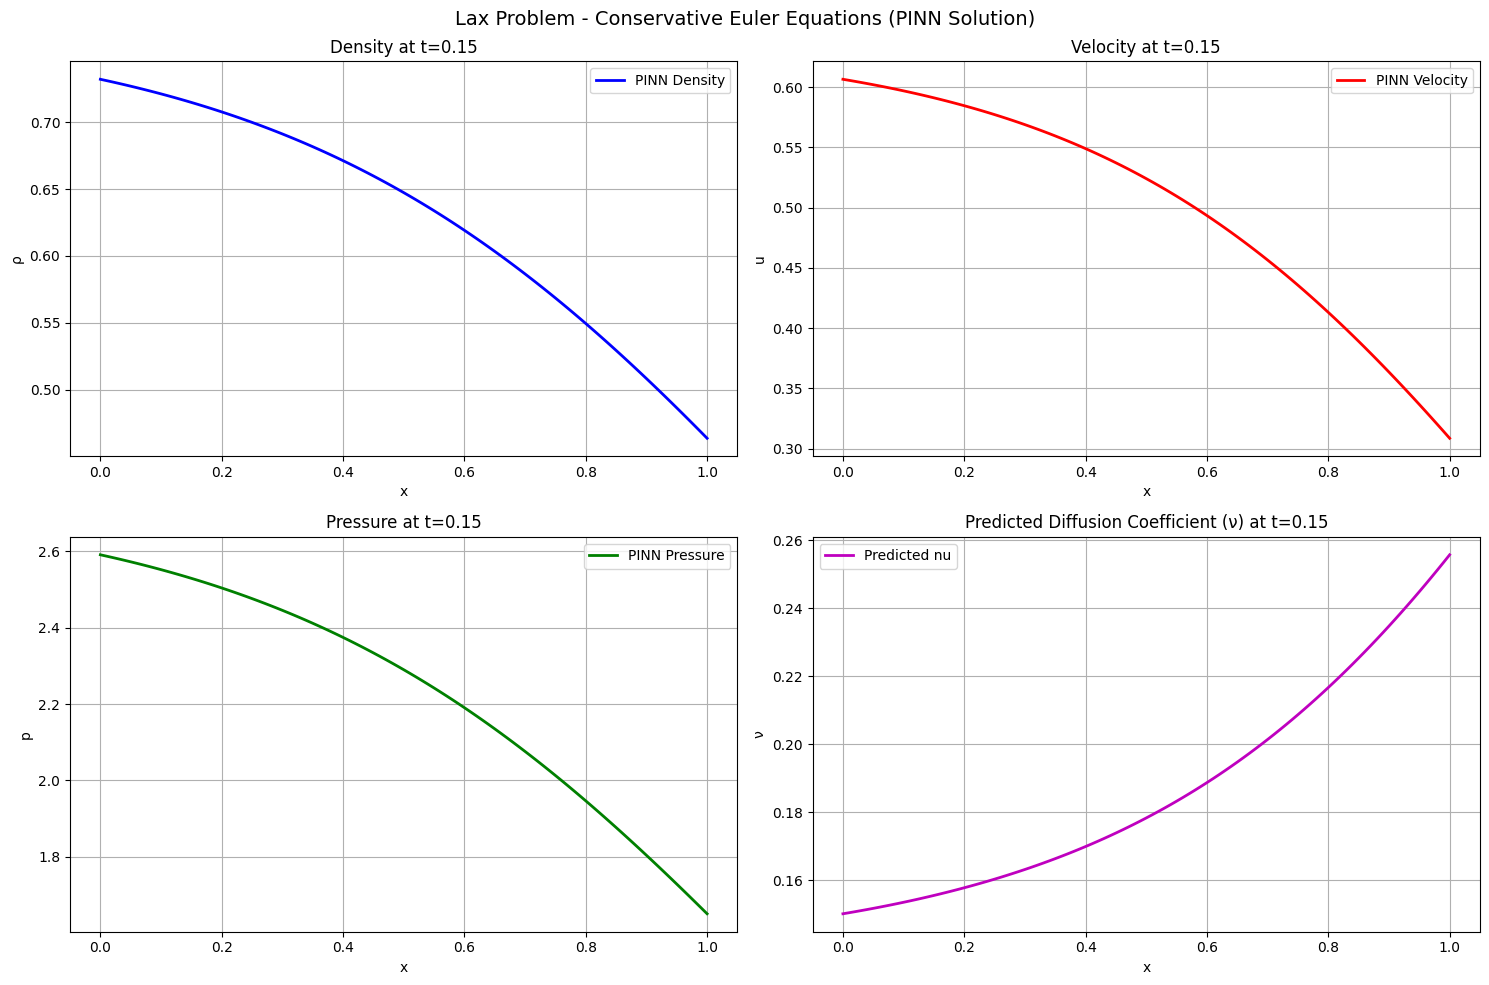

Lax Conservative problem completed!


In [ ]:
# 🔸 PROBLEM 7: Lax Problem (Conservative)
exec(open('problem_codes/lax_conservative.py').read())

---
## **8. Problem Statement Wedge Flow (Conservative)**

**Description:** 2D compressible flow around a wedge geometry. Demonstrates PINN capability for complex 2D supersonic flow with shock waves.



**Equations:** 2D Conservative Euler equations



**Setup:**
- Mach 2.0 freestream
- 10° wedge angle
- 2D domain with wedge geometry



**Features:**
- 2D shock wave formation
- Complex boundary conditions
- Supersonic flow physics

🔥 Wedge Flow Problem - Conservative 2D Euler Equations
🖥️ Using device: cuda
📊 Problem setup:
   - Domain: x ∈ [0.0, 2], y ∈ [0.0, 2.0]
   - Wedge angle: 10.0°
   - Mach number: 2.0
   - Freestream velocity: (2.37, 0.00)
🏗️ Building neural network model...
📊 Generating collocation and boundary points...
   - Interior points: 9767
   - Boundary points: 748
🚀 Starting training...
Epoch 0: Total=7.23e+01, PDE=5.45e-05, Inlet=7.17e+00, Wedge=5.85e-02
Epoch 500: Total=3.73e-02, PDE=1.41e-02, Inlet=7.43e-04, Wedge=1.57e-03
Epoch 1000: Total=1.42e-02, PDE=4.15e-03, Inlet=1.65e-04, Wedge=8.38e-04
Epoch 1500: Total=8.71e-03, PDE=2.09e-03, Inlet=5.44e-05, Wedge=6.08e-04
Epoch 2000: Total=6.63e-03, PDE=1.43e-03, Inlet=2.44e-05, Wedge=4.95e-04
Epoch 2500: Total=5.58e-03, PDE=1.08e-03, Inlet=1.57e-05, Wedge=4.34e-04
Epoch 3000: Total=4.78e-03, PDE=8.16e-04, Inlet=1.10e-05, Wedge=3.85e-04
Epoch 3500: Total=7.25e-03, PDE=2.66e-03, Inlet=8.58e-05, Wedge=3.73e-04
Epoch 4000: Total=5.15e-03, PDE=7.25e-0

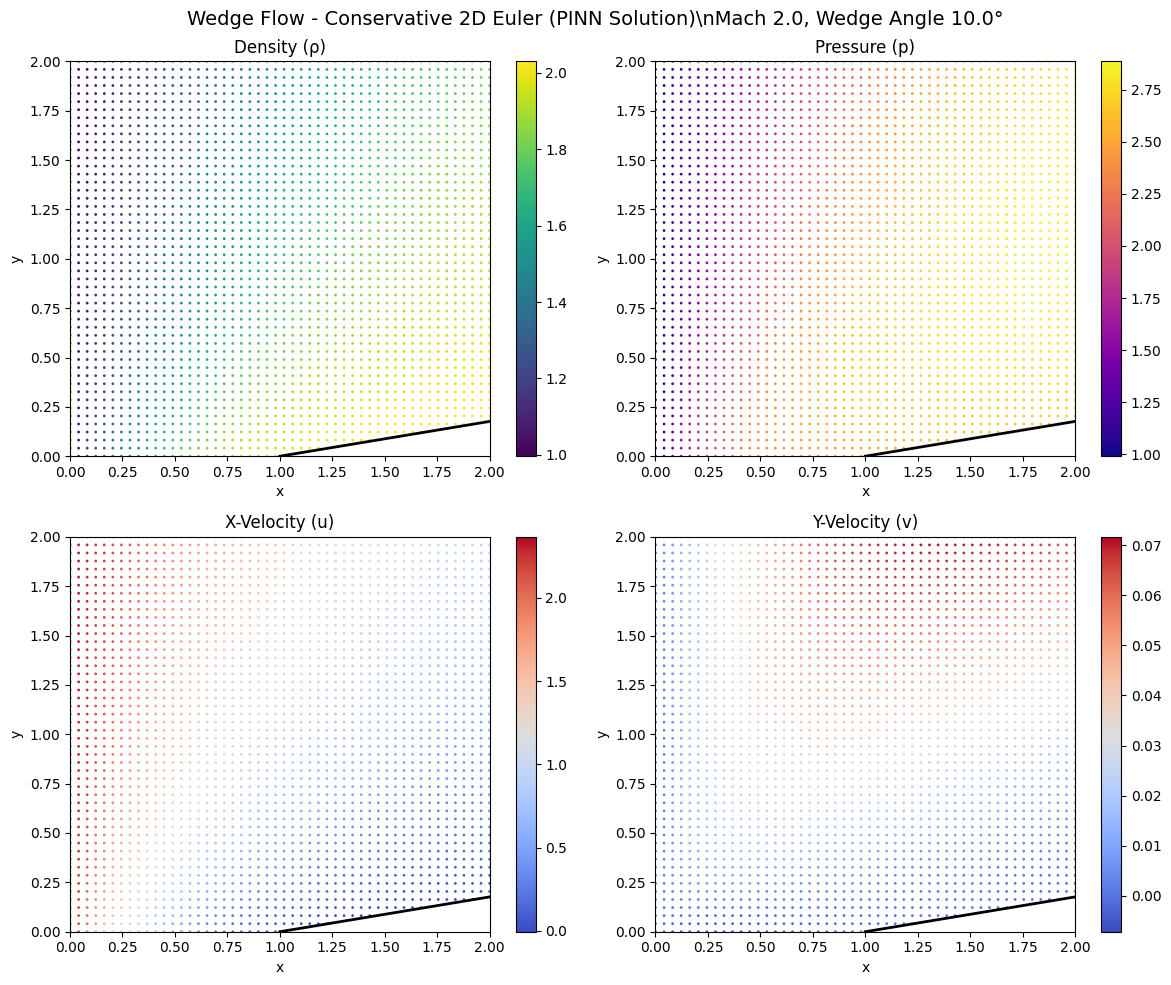

✅ Wedge Conservative problem completed!


In [1]:
# 🔸 PROBLEM 8: Wedge Flow (Conservative)
exec(open('problem_codes/wedge_conservative.py').read())

---
# **9. Problem Statement Wedge Flow (Non-Conservative)**

**Description:** 2D wedge flow using non-conservative formulation of the Euler equations.


**Features:**

- Non-conservative 2D Euler equations
- Same geometry as Problem 8
- Alternative mathematical formulation
- Primitive variable approach

Wedge Flow Problem - Non-Conservative 2D Euler Equations
Using device: cuda
Problem setup:
   - Domain: x ∈ [0.0, 2], y ∈ [0.0, 2.0]
   - Wedge angle: 10.0°
   - Mach number: 2.0
   - Freestream velocity: (2.37, 0.00)
Mesh file not found, using regular grid
Using 9951 domain points for training
Starting training...
Epoch | Time  | MSE_r   | MSE_v   | MSE_bc  
---------------------------------------------
   0  | 0.27  | 1.34e-02 | 5.66e-02 | 5.22e+00
   1  | 0.07  | 1.24e-02 | 5.79e-02 | 5.13e+00
   2  | 0.08  | 1.14e-02 | 5.91e-02 | 5.05e+00
   3  | 0.08  | 1.05e-02 | 6.02e-02 | 4.97e+00
   4  | 0.02  | 9.72e-03 | 6.14e-02 | 4.88e+00
   5  | 0.02  | 8.98e-03 | 6.25e-02 | 4.80e+00
   6  | 0.02  | 8.31e-03 | 6.35e-02 | 4.72e+00
   7  | 0.02  | 7.70e-03 | 6.46e-02 | 4.64e+00
   8  | 0.02  | 7.13e-03 | 6.56e-02 | 4.56e+00
   9  | 0.03  | 6.60e-03 | 6.67e-02 | 4.49e+00
  50  | 0.02  | 7.71e-03 | 2.82e-02 | 1.02e+00
 100  | 0.02  | 5.22e-03 | 7.20e-06 | 9.65e-02
 150  | 0.02  | 8.33e-03 | 2

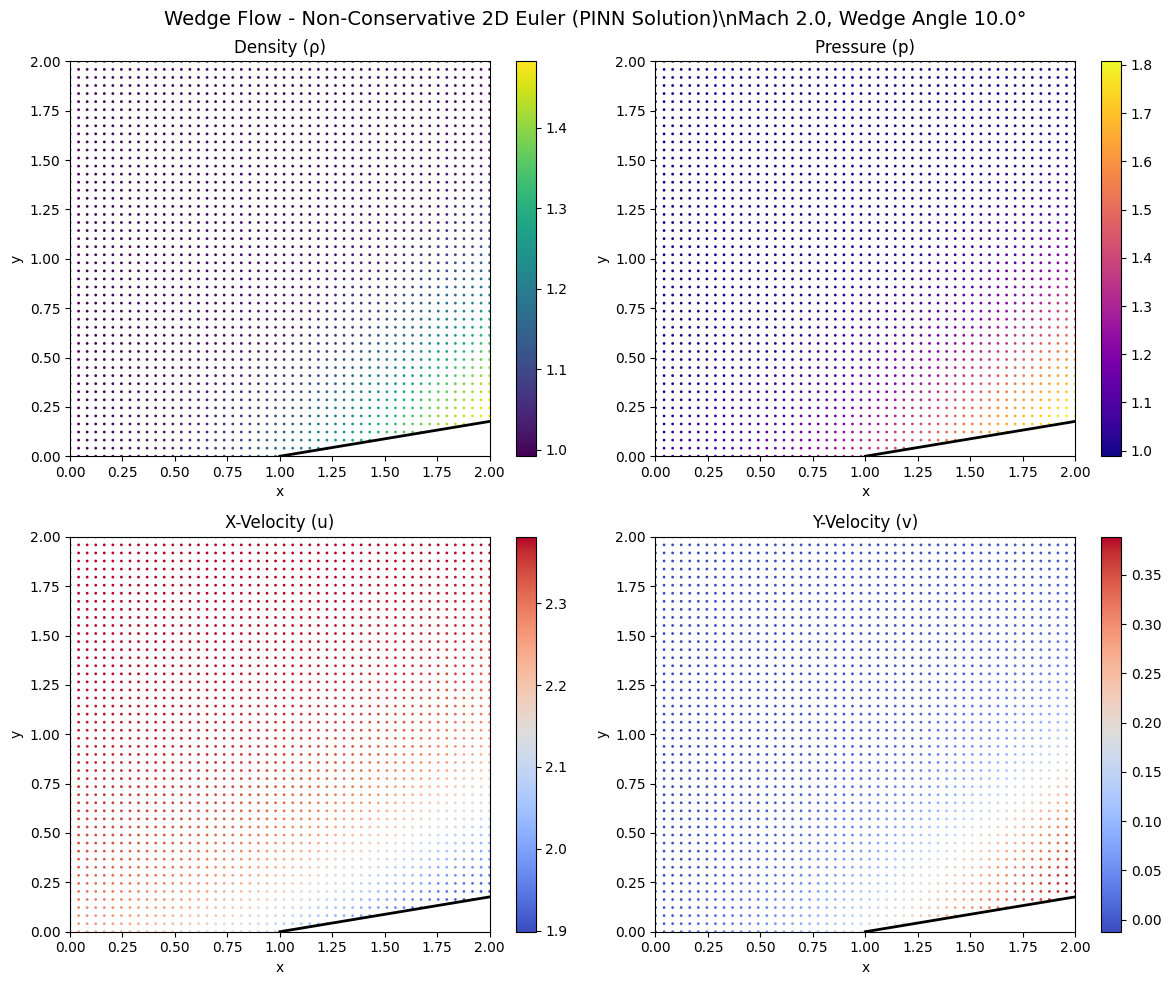

Wedge Non-Conservative problem completed!


In [3]:
# 🔸 PROBLEM 9: Wedge Flow (Non-Conservative)\n
exec(open('problem_codes/wedge_non_conservative.py').read())